# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algoritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
from skimage.io import imread

from tensorflow import keras
from sklearn.metrics import confusion_matrix

In [15]:
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [5]:
os.getcwd()

'd:\\Bootcamps_DS\\24_09_Bootcamp_DS\\2409_dsft_thebridge\\3-Machine_Learning\\3-Deep_Learning\\3-ComputerVision\\1-Redes_Convolucionales\\ejercicios'

In [7]:
os.listdir(os.getcwd() + "\\data\\seg_train")

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [8]:
IMAGE_SIZE = (32,32)
TRAIN_PATH = os.getcwd() + "\\data\\seg_train"
TEST_PATH = os.getcwd() + "\\data\\seg_test"

In [16]:
def read_data(path, im_size, class_names_label):
    X = []
    y = []

    for folder in os.listdir(path):
        print("Recorriendo ", folder)
        label = class_names_label[folder]
        folder_path = os.path.join(path, folder)
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            try:
                image = imread(image_path)
                smallimage = cv2.resize(image, im_size)
                X.append(smallimage)
                y.append(label)
            except Exception as e:
                print("Error en la lecura", image_path)
                print(e)
    return np.array(X), np.array(y)


In [17]:
X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE, class_names_label)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE, class_names_label)

Recorriendo  buildings
Recorriendo  forest
Recorriendo  glacier
Recorriendo  mountain
Recorriendo  sea
Recorriendo  street
Recorriendo  buildings
Recorriendo  forest
Recorriendo  glacier
Recorriendo  mountain
Recorriendo  sea
Recorriendo  street


In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14034, 32, 32, 3)
(3000, 32, 32, 3)
(14034,)
(3000,)


In [19]:
pd.Series(y_train).value_counts()

3    2512
2    2404
5    2382
4    2274
1    2271
0    2191
dtype: int64

In [20]:
pd.Series(y_test).value_counts()

2    553
3    525
4    510
5    501
1    474
0    437
dtype: int64

In [22]:
y_train[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [24]:
y_test[:100]

array([3, 2, 3, 0, 5, 2, 2, 4, 0, 5, 4, 0, 1, 3, 5, 1, 2, 1, 5, 5, 0, 0,
       2, 4, 2, 5, 5, 2, 0, 2, 2, 3, 1, 5, 0, 1, 4, 0, 0, 2, 0, 0, 0, 1,
       3, 3, 4, 0, 5, 3, 2, 4, 0, 4, 0, 5, 2, 1, 5, 2, 1, 1, 1, 0, 0, 2,
       2, 3, 3, 1, 3, 5, 5, 3, 0, 1, 4, 5, 4, 4, 3, 3, 1, 3, 4, 0, 5, 2,
       4, 5, 0, 2, 4, 2, 3, 0, 5, 4, 0, 3])

forest


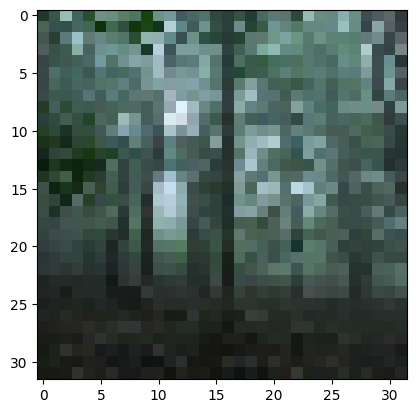

In [29]:
index = np.random.randint(X_train.shape[0])
print(class_names[y_train[index]])
plt.imshow(X_train[index])

In [30]:
X_train

array([[[[225, 225, 225],
         [221, 223, 222],
         [221, 223, 222],
         ...,
         [237, 237, 237],
         [238, 238, 238],
         [240, 240, 240]],

        [[230, 230, 230],
         [227, 227, 227],
         [232, 232, 232],
         ...,
         [244, 244, 244],
         [244, 244, 244],
         [246, 246, 246]],

        [[ 55,  55,  55],
         [223, 223, 223],
         [ 88,  87,  88],
         ...,
         [245, 245, 245],
         [246, 246, 246],
         [246, 246, 246]],

        ...,

        [[114, 112, 111],
         [ 97,  96,  94],
         [125, 123, 124],
         ...,
         [ 90,  89,  87],
         [ 88,  87,  85],
         [ 92,  91,  89]],

        [[153, 152, 150],
         [113, 112, 110],
         [123, 121, 122],
         ...,
         [ 83,  82,  79],
         [ 68,  67,  65],
         [ 80,  79,  77]],

        [[131, 130, 128],
         [133, 132, 130],
         [128, 126, 125],
         ...,
         [128, 127, 125],
        

In [32]:
X_train = X_train/255
X_test = X_test/255

In [33]:
print(X_train.min())
print(X_train.max())

0.0
1.0


In [35]:
X_train.shape

(14034, 32, 32, 3)

In [50]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3)),
    # keras.layers.MaxPooling2D(2,2),
    # keras.layers.Conv2D(16, (3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(32),
    keras.layers.Dense(16),
    keras.layers.Dense(6, activation="softmax")
])

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1152)              0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [52]:
64*(3*3)*3 + 64

1792

In [53]:
32*(3*3)*64 + 32

18464

In [54]:
6*6*32 * 32 + 32

36896

In [48]:
32*16 + 16

528

In [49]:
16*6 + 6

102

In [57]:
model.compile(optimizer="adam",
              loss= "sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [62]:
14034 * 0.9 / 128

98.6765625

In [63]:
history = model.fit(X_train,
                    y_train,
                    batch_size = 128,
                    epochs = 20,
                    validation_split=0.1)

Epoch 1/20


99/99 [==============================] - 9s 75ms/step - loss: 1.2789 - accuracy: 0.4918 - val_loss: 1.0274 - val_accuracy: 0.6140
Epoch 2/20
99/99 [==============================] - 7s 69ms/step - loss: 0.9781 - accuracy: 0.6349 - val_loss: 0.9463 - val_accuracy: 0.6510
Epoch 3/20
99/99 [==============================] - 7s 67ms/step - loss: 0.8885 - accuracy: 0.6709 - val_loss: 0.8449 - val_accuracy: 0.6816
Epoch 4/20
99/99 [==============================] - 7s 70ms/step - loss: 0.8195 - accuracy: 0.7010 - val_loss: 0.8124 - val_accuracy: 0.7051
Epoch 5/20
99/99 [==============================] - 7s 67ms/step - loss: 0.7859 - accuracy: 0.7100 - val_loss: 0.7589 - val_accuracy: 0.7258
Epoch 6/20
99/99 [==============================] - 7s 68ms/step - loss: 0.7375 - accuracy: 0.7304 - val_loss: 0.7413 - val_accuracy: 0.7393
Epoch 7/20
99/99 [==============================] - 7s 72ms/step - loss: 0.7230 - accuracy: 0.7392 - val_loss: 0.7354 - val_accuracy: 0.7415
Epoch 8/20


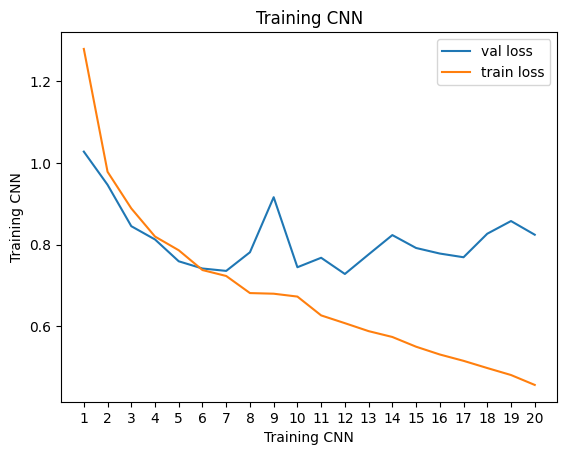

In [65]:
df_hist = pd.DataFrame(history.history, index=np.arange(1,21))
plt.plot(df_hist['val_loss'], label="val loss")
plt.plot(df_hist['loss'], label="train loss")
plt.title("Training CNN")
plt.xlabel("Training CNN")
plt.ylabel("Training CNN")
plt.xticks(np.arange(1,21))
plt.legend()

In [ ]:
results = model.evaluate(X_test, y_test)

94/94 [==============================] - 1s 7ms/step - loss: 0.8807 - accuracy: 0.7057


In [70]:
y_pred = model.predict(X_test)

94/94 [==============================] - 1s 6ms/step


In [71]:
confusion_matrix(y_pred.argmax(axis=1), y_test)

array([[252,   7,  12,  22,  23,  61],
       [ 31, 440,  10,   5,   7,  45],
       [ 11,   2, 329,  52,  44,  14],
       [ 18,   1, 102, 372,  58,   6],
       [ 31,   4,  84,  62, 364,  15],
       [ 94,  20,  16,  12,  14, 360]], dtype=int64)

In [72]:
IMAGE_SIZE = (64,64)

In [73]:
X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE, class_names_label)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE, class_names_label)

Recorriendo  buildings
Recorriendo  forest
Recorriendo  glacier
Recorriendo  mountain
Recorriendo  sea
Recorriendo  street
Recorriendo  buildings
Recorriendo  forest
Recorriendo  glacier
Recorriendo  mountain
Recorriendo  sea
Recorriendo  street


In [74]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [75]:
X_train = X_train/255
X_test = X_test/255

In [78]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), input_shape=(64,64,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(6, activation="softmax")
])

In [79]:
model.compile(optimizer="adam",
              loss= "sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [80]:
early_stopping = keras.callbacks.EarlyStopping(patience=5)

In [81]:
history = model.fit(X_train,
                    y_train,
                    batch_size = 128,
                    epochs = 20,
                    validation_split=0.1,
                    callbacks=[early_stopping])

Epoch 1/20
99/99 [==============================] - 32s 303ms/step - loss: 1.1975 - accuracy: 0.5343 - val_loss: 0.9474 - val_accuracy: 0.6396
Epoch 2/20
99/99 [==============================] - 27s 276ms/step - loss: 0.9626 - accuracy: 0.6393 - val_loss: 0.8480 - val_accuracy: 0.6937
Epoch 3/20
99/99 [==============================] - 27s 269ms/step - loss: 0.8855 - accuracy: 0.6650 - val_loss: 0.8769 - val_accuracy: 0.6574
Epoch 4/20
99/99 [==============================] - 27s 272ms/step - loss: 0.8186 - accuracy: 0.7017 - val_loss: 0.8298 - val_accuracy: 0.6823
Epoch 5/20
99/99 [==============================] - 27s 273ms/step - loss: 0.7738 - accuracy: 0.7189 - val_loss: 0.7635 - val_accuracy: 0.7137
Epoch 6/20
99/99 [==============================] - 27s 275ms/step - loss: 0.7136 - accuracy: 0.7455 - val_loss: 0.7379 - val_accuracy: 0.7393
Epoch 7/20
99/99 [==============================] - 26s 262ms/step - loss: 0.6795 - accuracy: 0.7553 - val_loss: 0.6869 - val_accuracy: 0.7486

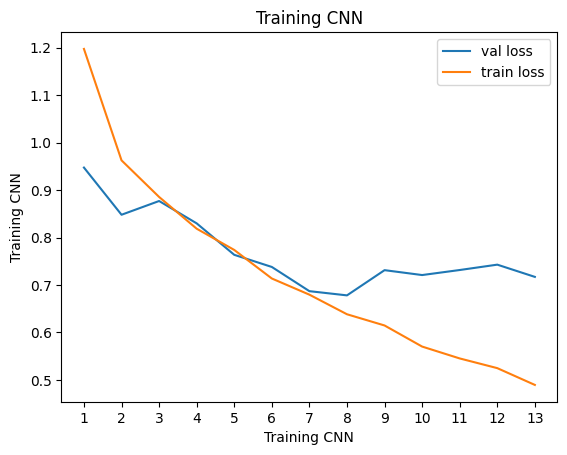

In [83]:
df_hist = pd.DataFrame(history.history, index=np.arange(1,14))
plt.plot(df_hist['val_loss'], label="val loss")
plt.plot(df_hist['loss'], label="train loss")
plt.title("Training CNN")
plt.xlabel("Training CNN")
plt.ylabel("Training CNN")
plt.xticks(np.arange(1,14))
plt.legend()

In [84]:
results = model.evaluate(X_test, y_test)

94/94 [==============================] - 2s 24ms/step - loss: 0.7781 - accuracy: 0.7283


In [85]:
y_pred = model.predict(X_test)
y_pred.round(2)

94/94 [==============================] - 2s 20ms/step


array([[0.01, 0.  , 0.08, 0.9 , 0.01, 0.  ],
       [0.02, 0.  , 0.72, 0.  , 0.02, 0.24],
       [0.  , 0.  , 0.03, 0.45, 0.52, 0.  ],
       ...,
       [0.01, 0.  , 0.12, 0.35, 0.53, 0.  ],
       [0.01, 0.  , 0.07, 0.31, 0.61, 0.  ],
       [0.03, 0.95, 0.  , 0.  , 0.  , 0.02]], dtype=float32)

mountain
[1.1785825e-03 3.5251534e-05 2.5359413e-02 4.5047316e-01 5.2239698e-01
 5.5659981e-04]


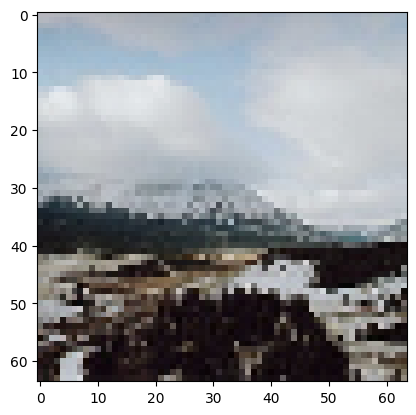

In [87]:
print(class_names[y_test[2]])
print(y_pred[2])
plt.imshow(X_test[2])

In [89]:
pred_labels = np.argmax(y_pred, axis=1)
print(pred_labels)
pred_names = [class_names[pred] for pred in pred_labels]
print(pred_names)

[3 2 4 ... 4 4 1]
['mountain', 'glacier', 'sea', 'street', 'street', 'glacier', 'glacier', 'sea', 'buildings', 'street', 'sea', 'street', 'forest', 'mountain', 'sea', 'forest', 'glacier', 'forest', 'street', 'buildings', 'buildings', 'buildings', 'glacier', 'glacier', 'glacier', 'sea', 'street', 'glacier', 'buildings', 'glacier', 'glacier', 'mountain', 'forest', 'glacier', 'buildings', 'forest', 'mountain', 'mountain', 'street', 'glacier', 'buildings', 'street', 'buildings', 'forest', 'mountain', 'mountain', 'sea', 'buildings', 'street', 'glacier', 'mountain', 'forest', 'buildings', 'glacier', 'buildings', 'street', 'glacier', 'forest', 'buildings', 'mountain', 'forest', 'forest', 'forest', 'buildings', 'street', 'mountain', 'glacier', 'mountain', 'sea', 'forest', 'mountain', 'street', 'buildings', 'mountain', 'glacier', 'forest', 'sea', 'street', 'sea', 'mountain', 'mountain', 'mountain', 'forest', 'glacier', 'buildings', 'buildings', 'street', 'glacier', 'mountain', 'buildings', 'bui

<Axes: >

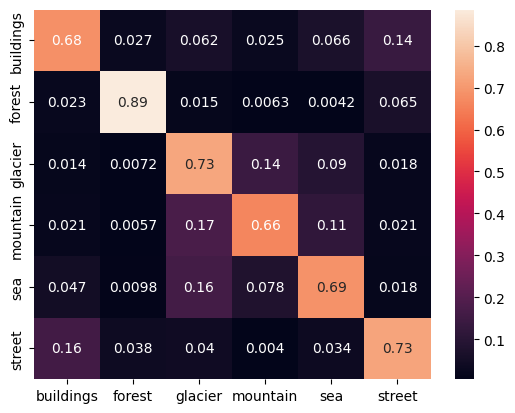

In [91]:
c_mat = confusion_matrix(y_test, pred_labels, normalize='true')
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)

In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69       437
           1       0.91      0.89      0.90       474
           2       0.64      0.73      0.68       553
           3       0.72      0.66      0.69       525
           4       0.69      0.69      0.69       510
           5       0.75      0.73      0.74       501

    accuracy                           0.73      3000
   macro avg       0.73      0.73      0.73      3000
weighted avg       0.73      0.73      0.73      3000



In [ ]:
# model.predict(X_test[100])